## Reto 2: Matriz de correlaciones

### 1. Objetivos:
    - Aprender a generar e interpretar una matriz de correlaciones
 
---
    
### 2. Desarrollo:

Para este Reto vamos a utilizar un conjunto de datos llamado 'wine_quality_red-clean.csv'. Este dataset tiene datos acerca de diversos tipos de vino rojo. Incluye datos acerca de la composición química de los vinos y una variable 'quality' que es una evaluación de la calidad del vino que va del 1 al 10.

Aquí esta [el link](https://archive.ics.uci.edu/ml/datasets/wine+quality) de donde proviene este dataset.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np

In [5]:
df = pd.read_csv('/content/drive/MyDrive/Remoto Datasets/Remoto wine_quality_red-clean.csv',index_col=0)
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
# Eliminamos la variable categorica ordinal. 
df.drop('quality',inplace=True,axis=1)

In [7]:
matriz_correlacion = df.corr()

Vamos a explorar las relaciones que existen entre estas variables. Para esto, genera un heatmap para visualizar el coeficiente de correlación de Pearson entre todas las variables del dataset. Añade un título y utiliza [la documentación](https://seaborn.pydata.org/generated/seaborn.heatmap.html) para modificar la gráfica a tu gusto y hacerla más atractiva y comprensible. Puedes modificar el grosor de las líneas entre los cuadros, el color de los cuadros, el rango total del espectro de colores, etc. Después de tener lista tu visualización, responde las siguientes preguntas y coméntalas con tus compañeros y la experta:

1. ¿Qué variables no tienen una correlación lineal entre ellas?
2. ¿Qué variables tienen correlaciones positivas?
3. ¿Qué par de variables tiene la mayor correlación positiva?
4. ¿Qué variables tienen correlaciones negativas?
5. ¿Qué par de variables tiene la mayor correlación negativa?
6. ¿Tienes algunas hipótesis acerca de por qué existen estas correlaciones (o porque no existen)?

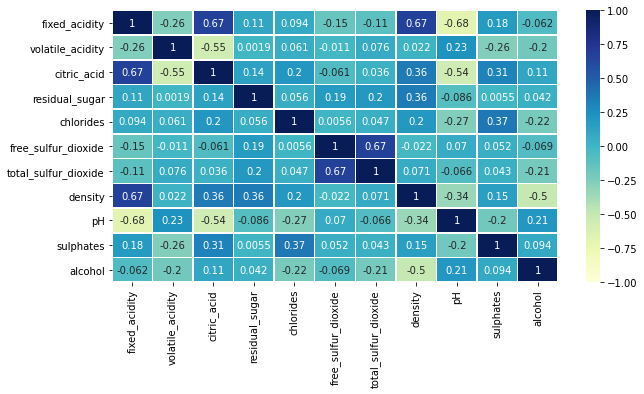

In [10]:
plt.figure(figsize=(10,5))
ax = sns.heatmap(matriz_correlacion,vmin=-1,vmax=1,annot=True, cmap='YlGnBu', linewidths=.5)

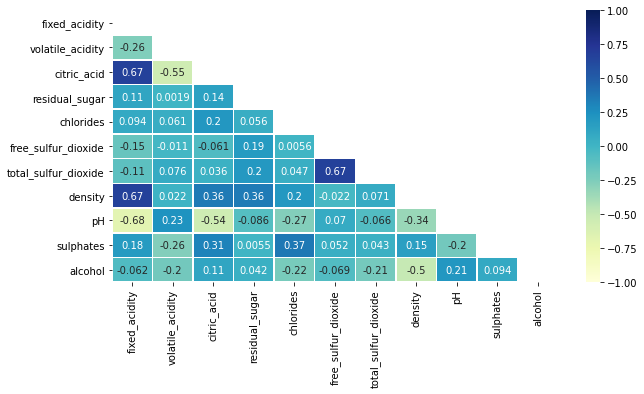

In [16]:
mask = np.zeros_like(matriz_correlacion)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(10,5))
ax = sns.heatmap(matriz_correlacion, mask=mask, vmin=-1,vmax=1,annot=True, cmap='YlGnBu', linewidths=.5)

**¿Qué variables no tienen una correlación lineal entre ellas?**

Muchas, por ejemplo: residual_sugar vs volatile_acidity, citric_acid vs total_sulfur_dioxide, chlorides vs free_sulfur_dioxide. 

**¿Qué variables tienen correlaciones positivas?**

density vs fixed_acidity, free_sulfur_dioxide vs total_sulfur_dioxide, fixed_acidity vs citric_acid, pH vs alcohol, pH y volatile_acidity. 

**¿Qué par de variables tiene la mayor correlación positiva?**

density vs fixed_acidity, free_sulfur_dioxide vs total_sulfur_dioxide, fixed_acidity vs citric_acid

**¿Qué variables tienen correlaciones negativas?**

pH vs acid_citric, chlorides vs sulphates, volatile_acidity vs  fixed_acidity, etc. 

**¿Qué par de variables tiene la mayor correlación negativa?**

volatile_acidity vs fixed_acidity, density vs alcohol, pH vs fixed_acidity, volatile_acidity vs citric_acid

**¿Tienes algunas hipótesis acerca de por qué existen estas correlaciones (o porque no existen)?**

*   El pH es un indicador de acidez, por ello, a mayor acidez su valor es más bajo (Esto implica que es un ácido) 
*   ¿El alcohol no es tan denso por ello disminuye la densidad?